In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import folium
from folium import plugins
sns.set()
from folium.plugins import MarkerCluster
from scipy import stats
stats.chisqrob = lambda chisq, df: stats.ch12.sf(chisq,df)

pd.set_option('display.max_columns', None)

In [9]:
raw_data = pd.read_csv('../Datasets/LA_Crime_Data_2020_2023.csv',header=None)

data = raw_data.copy()

data

C:\Users\deonp\AppData\Local\Temp\ipykernel_41640\2461867597.py:1: DtypeWarning: Columns (0,3,5,6,7,10,13,15,19,20,21,22,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../Datasets/LA_Crime_Data_2020_2023.csv',header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
1,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
2,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
3,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
4,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852946,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.279,-118.4116
852947,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
852948,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
852949,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [10]:
data.columns = data.iloc[0]
data.drop(data.index[0]).reset_index(inplace=True,drop=True)
data.drop(0, inplace=True)
data

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
1,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
2,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
3,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
4,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
5,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852946,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.279,-118.4116
852947,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
852948,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
852949,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [11]:
data['date_occurred'] = pd.to_datetime(data['date_occurred'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
data['date_reported'] = pd.to_datetime(data['date_reported'], format='%Y-%m-%d', errors='coerce')

In [12]:
data.sort_values(by='date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
39026,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,1609 0321,44,M,O,504.0,OTHER RESIDENCE,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,3800 WINFORD DR,NaN,34.1386,-118.5525
137158,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 0344 1402,75,M,X,402.0,MARKET,NaN,NaN,AA,Adult Arrest,343.0,998.0,NaN,NaN,20000 W VENTURA BL,NaN,34.1719,-118.5684
2390,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,0432 1501 0443,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",NaN,NaN,IC,Invest Cont,888.0,NaN,NaN,NaN,3300 S FIGUEROA ST,NaN,34.0225,-118.2796
103595,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,1822 0344 0400 0342,50,M,B,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,NaN,NaN,NaN,CENTURY,AVALON BL,33.9456,-118.2652
25892,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,1609 0344 1307 0329 1822,26,F,W,108.0,PARKING LOT,NaN,NaN,AO,Adult Other,330.0,NaN,NaN,NaN,300 E 2ND ST,NaN,34.0498,-118.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770236,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,1307 0344 0329,0,NaN,NaN,717.0,HEALTH SPA/GYM,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,700 W CESAR E CHAVEZ AV,NaN,34.0606,-118.2439
692346,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,11400 AMBOY AV,NaN,34.2767,-118.4477
835684,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,1820 0930,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,21400 SATICOY ST,NaN,34.2119,-118.6017
825608,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 0385,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,331.0,NaN,NaN,NaN,N KENMORE AV,HOLLYWOOD BL,34.1018,-118.2973


In [13]:
streetCrime_df = data[data['premise_description'] == 'STREET']
streetCrime_df


,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
11,200100509,2020-01-04,2020-01-04 22:00:00,1,Central,192,1,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,A,101.0,STREET,306.0,ROCK/THROWN OBJECT,IC,Invest Cont,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
39,200100572,2020-01-28,2020-01-28 21:00:00,1,Central,181,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329 1300 1822 1414 1420,0,X,X,101.0,STREET,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,11TH ST,FIGUEROA ST,34.0431,-118.2692
42,200100576,2020-01-30,2020-01-30 00:55:00,1,Central,195,1,330,BURGLARY FROM VEHICLE,0344 1605 1611 1822 0385 0321,24,M,H,101.0,STREET,NaN,NaN,AA,Adult Arrest,330.0,NaN,NaN,NaN,18TH ST,LOS ANGELES ST,34.0317,-118.2626
46,221412410,2022-06-15,2020-11-12 17:00:00,14,Pacific,1444,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 MARINA POINT DR,NaN,33.9876,-118.4489
58,200104033,2020-01-01,2020-01-01 02:30:00,1,Central,143,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 2000,25,M,W,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.0,NaN,NaN,NaN,400 S HILL ST,NaN,34.0503,-118.2504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852927,230406516,2023-03-19,2023-03-19 01:22:00,4,Hollenbeck,488,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3200 GARNET ST,NaN,34.0248,-118.2076
852929,230609209,2023-05-01,2023-04-29 06:00:00,6,Hollywood,639,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1800 WINONA BL,NaN,34.1038,-118.302
852931,231514016,2023-08-27,2023-08-27 00:30:00,15,N Hollywood,1548,1,761,BRANDISH WEAPON,0334,38,M,H,101.0,STREET,200.0,KNIFE WITH BLADE 6INCHES OR LESS,AO,Adult Other,761.0,NaN,NaN,NaN,11000 MCCORMICK ST,NaN,34.166,-118.3705
852936,230612923,2023-07-24,2023-07-24 14:00:00,6,Hollywood,638,1,210,ROBBERY,0400 0416 0344,23,F,B,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,624.0,NaN,NaN,5500 HOLLYWOOD BL,NaN,34.1038,-118.3151


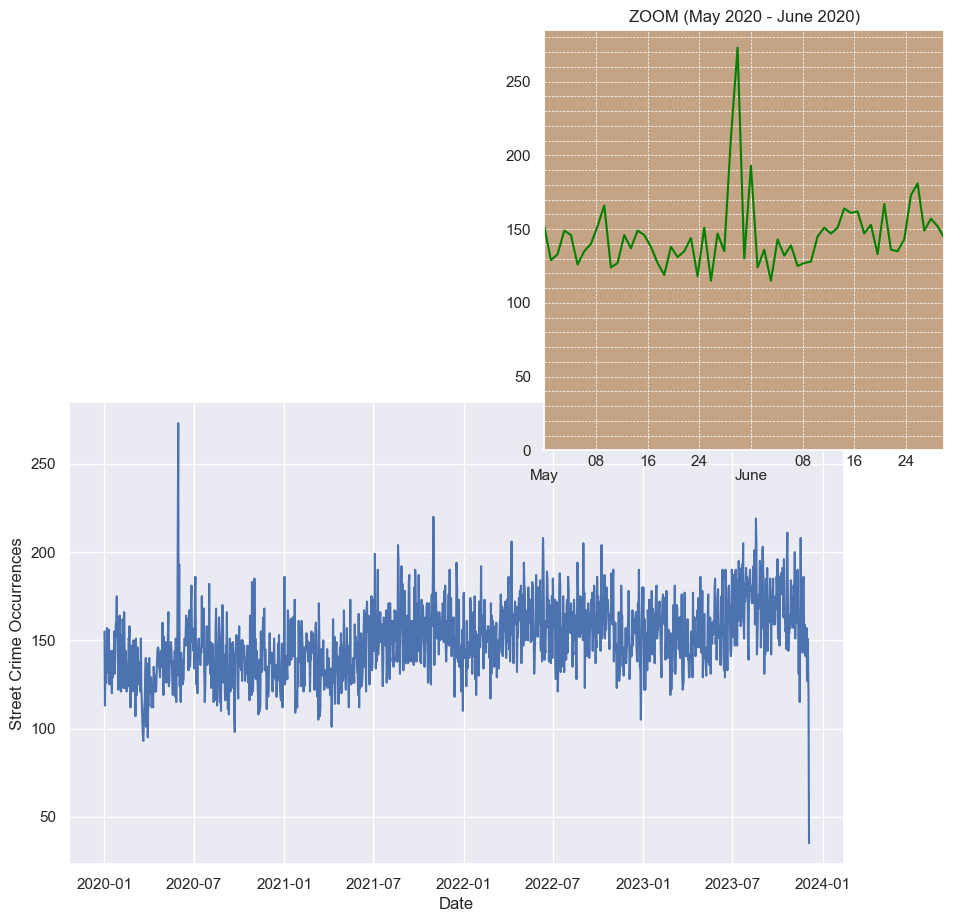

In [65]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator

%matplotlib inline

# Calculate the number of crimes per day
crime_counts_per_day = streetCrime_df['date_occurred'].dt.normalize().value_counts().sort_index()

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(crime_counts_per_day.index, crime_counts_per_day.values, label='Crime Counts per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Street Crime Occurrences')
# Define the position of the inset using [left, bottom, width, height]
left, bottom, width, height = [0.6, 0.8, 0.4, .7]
ax_inset = fig.add_axes([left, bottom, width, height])  # The inset plot

# Plot the same data on the inset, focusing on a specific time frame
ax_inset.plot(crime_counts_per_day.index, crime_counts_per_day.values, color='green')
ax_inset.set_xlim([pd.Timestamp('2020-05-01'), pd.Timestamp('2020-06-30')])
ax_inset.set_ylim(bottom=0)
ax_inset.set_title('ZOOM (May 2020 - June 2020)')

# Major and minor tick settings
ax_inset.xaxis.set_major_locator(mdates.MonthLocator())
ax_inset.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Month name
ax_inset.xaxis.set_minor_locator(mdates.DayLocator(interval=7))  # Minor ticks every 7 days
ax_inset.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))  # Day of the month for minor ticks

ax_inset.minorticks_on()
ax_inset.tick_params(axis='x', which='minor', direction='in', length=5, color='red')  # Customize minor ticks
ax_inset.tick_params(axis='x', which='major', length=10, color='blue')  # Customize major ticks

# Enabling grid for both major and minor ticks
ax_inset.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adjust line style and width as needed

ax_inset.yaxis.set_major_locator(MultipleLocator(50))  # Adjust 50 to your desired interval for y-grid lines
# Setting a different background color for the inset plot
ax_inset.set_facecolor('#C4A484')  # Light grey background


fig.autofmt_xdate()  # Auto format date labels to prevent overlap
plt.show()



In [20]:
may_2020_streetCrime_df = streetCrime_df[streetCrime_df['date_occurred'].dt.month == 5]


may_2020_streetCrime_df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
316,211115965,2021-12-02,2020-05-13 09:30:00,11,Northeast,1172,2,946,OTHER MISCELLANEOUS CRIME,1501,0,M,O,101.0,STREET,NaN,NaN,IC,Invest Cont,946.0,NaN,NaN,NaN,2200 W FOX LN,NaN,34.0888,-118.2596
433,200610092,2020-05-10,2020-05-10 17:45:00,6,Hollywood,646,1,330,BURGLARY FROM VEHICLE,1300 1601 1606 0344 0352,22,F,B,101.0,STREET,NaN,NaN,AO,Adult Other,330.0,NaN,NaN,NaN,SUNSET,HUDSON,34.098,-118.3316
720,200408506,2020-05-04,2020-05-04 03:00:00,4,Hollenbeck,479,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 E 7TH ST,NaN,34.0246,-118.1998
950,200409340,2020-05-29,2020-05-27 12:30:00,4,Hollenbeck,439,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,2000 BARNETT RD,NaN,34.0664,-118.1722
1281,200112355,2020-05-30,2020-05-29 16:00:00,1,Central,105,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,400 SOLANO AV,NaN,34.071,-118.2302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852656,230112354,2023-05-14,2023-05-14 18:18:00,1,Central,156,1,440,THEFT PLAIN - PETTY ($950 & UNDER),2032 0344 1822 1218,49,F,W,101.0,STREET,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,500 S SAN PEDRO ST,NaN,34.0437,-118.2455
852748,231608401,2023-05-21,2023-05-19 22:30:00,16,Foothill,1685,2,437,RESISTING ARREST,1501 1816 0416,0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,437.0,NaN,NaN,NaN,FAIR,ARMINTA,34.2173,-118.3835
852805,231212288,2023-05-18,2023-05-18 21:50:00,12,77th Street,1265,2,753,DISCHARGE FIREARMS/SHOTS FIRED,1100 1822 1309 1402 1407,0,X,X,101.0,STREET,106.0,UNKNOWN FIREARM,IC,Invest Cont,753.0,NaN,NaN,NaN,NORMANDIE,80TH ST,33.9664,-118.3002
852812,231310432,2023-05-09,2023-05-09 13:22:00,13,Newton,1341,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3700 S MAIN ST,NaN,34.0155,-118.2772


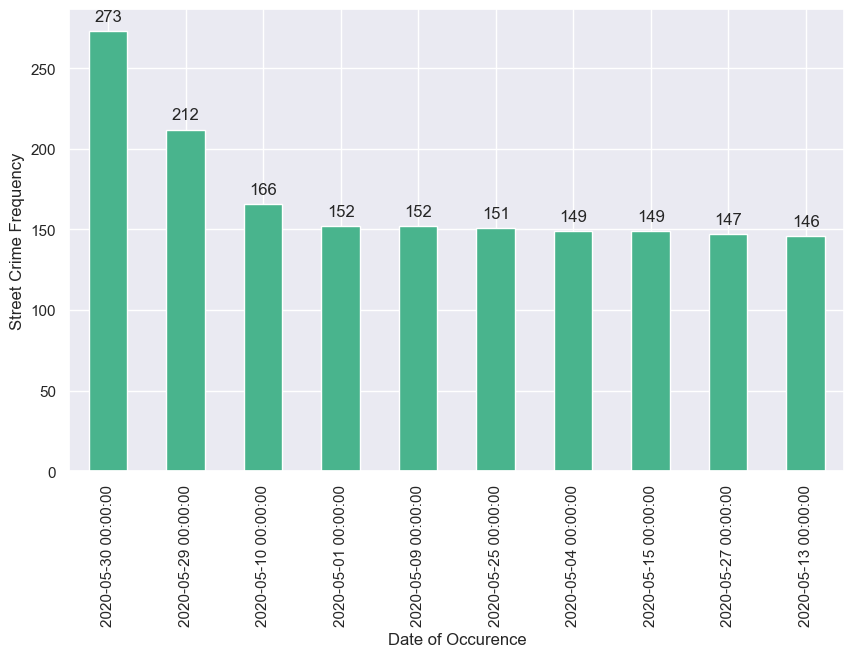

In [63]:

may2020_crime_counts = may_2020_streetCrime_df['date_occurred'].dt.normalize().value_counts().sort_index().sort_values(ascending=False)
may2020_crime_counts= may2020_crime_counts.sort_values(ascending=False).head(10)


# Create the bar plot
ax = may2020_crime_counts.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='#49b48d')
ax.set_xlabel('Date of Occurence')
ax.set_ylabel('Street Crime Frequency')
# Annotate the top of each bar with the value count
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', 
                va='bottom', 
                xytext=(0, 5), 
                textcoords='offset points')


plt.show()


In [23]:
may_2020_streetCrime_df = streetCrime_df[(streetCrime_df['date_occurred'].dt.month == 5) & (streetCrime_df['date_occurred'].dt.year==2020)]
june_2020_streetCrime_df = streetCrime_df[(streetCrime_df['date_occurred'].dt.month == 6) & (streetCrime_df['date_occurred'].dt.year==2020)]

C:\Users\deonp\AppData\Local\Temp\ipykernel_41640\3399975168.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(may.index, fontfamily='serif', rotation=90)


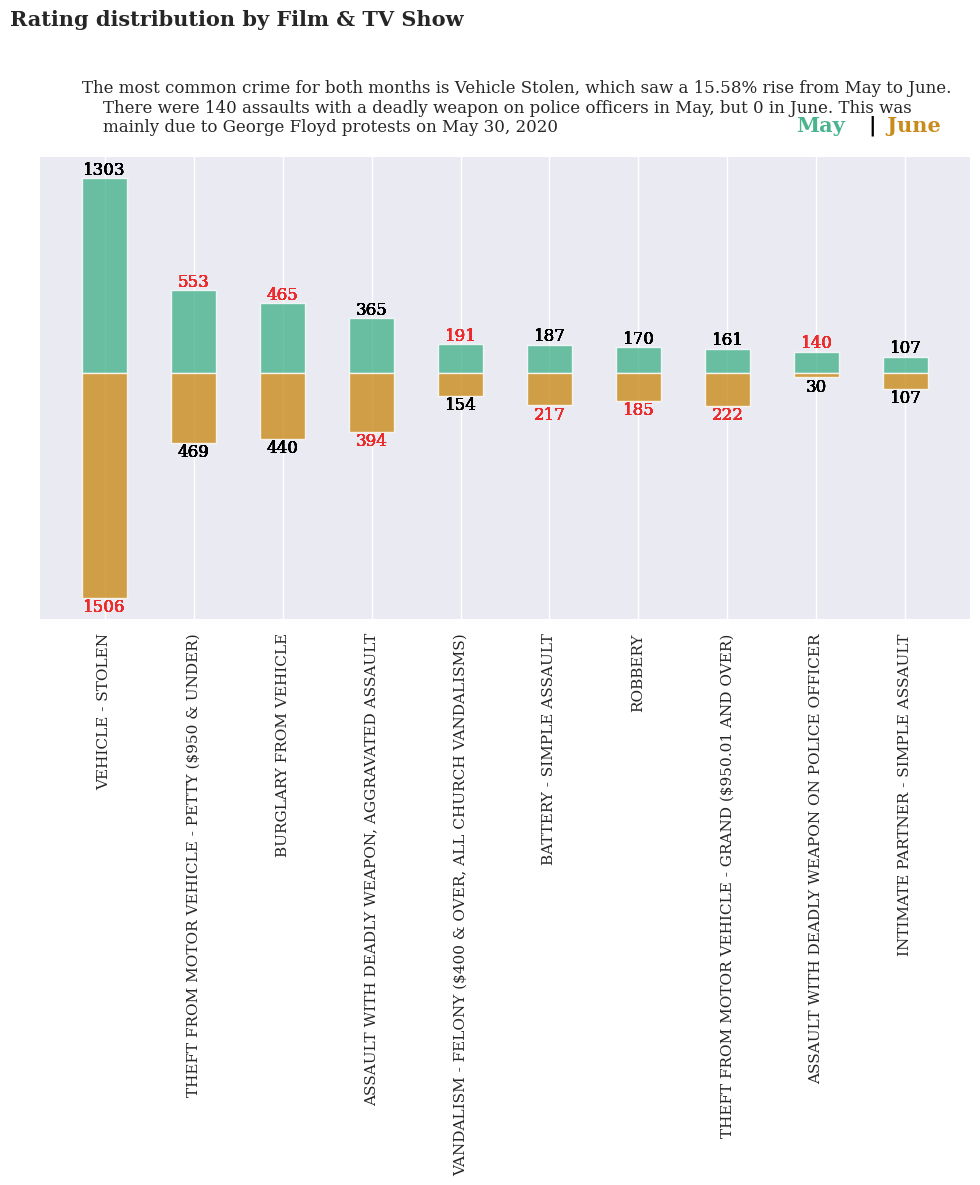

In [24]:


may = may_2020_streetCrime_df['crime_description'].value_counts().head(10)


columns = may.index
june_counts = june_2020_streetCrime_df['crime_description'].value_counts()
june_filtered = june_counts[june_counts.index.isin(columns)]

june = - june_filtered

may.sort_values(ascending=False, inplace=True)
june.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(may.index, may, width=0.5, color='#49b48d', alpha=0.8, label='Movie')
ax.bar(june.index, june, width=0.5, color='#c98b1c', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in june.index:
    for i in may.index:
        if -june[i] > may[i]:
            ax.annotate(f"{-june[i]}", 
                   xy=(i, june[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#ed2b2b')
        elif -june[i] <= may[i]:
            ax.annotate(f"{-june[i]}", 
                   xy=(i, june[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#000000')
            
        

for i in may.index:
    for i in june.index:
         if -june[i] < may[i]:
                ax.annotate(f"{may[i]}", 
                   xy=(i, may[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#ed2b2b')
         elif -june[i] >= may[i]:
            ax.annotate(f"{may[i]}", 
                   xy=(i, may[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#000000')
        
    
 
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(may.index, fontfamily='serif', rotation=90)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.10, 1.1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
''' 
The most common crime for both months is Vehicle Stolen, which saw a 15.58% rise from May to June.
    There were 140 assaults with a deadly weapon on police officers in May, but 0 in June. This was
    mainly due to George Floyd protests on May 30, 2020
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.755,0.924,"May", fontweight="bold", fontfamily='serif', fontsize=15, color='#49b48d')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924," June", fontweight="bold", fontfamily='serif', fontsize=15, color='#c98b1c')

plt.show()

In [60]:
# Vehicle stolen is the most commonly occuring crime
car_theft_df = data[data['crime_description'] == 'VEHICLE - STOLEN' ]
car_theft_sept_2023_df = car_theft_df[(car_theft_df['date_reported'].dt.year == 2023) & (car_theft_df['date_reported'].dt.month==9)
                                      & (car_theft_df['premise_description']=='STREET')]
car_theft_sept_2023_df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,victim_age,victim_sex,victim_descent,premise_code,premise_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
134195,231013398,2023-09-06,2020-12-15 17:00:00,10,West Valley,1075,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,NESTLE,VENTURA,34.1663,-118.5298
198682,231317622,2023-09-20,2020-09-11 11:00:00,13,Newton,1377,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,5500 MORGAN AV,NaN,33.993,-118.2446
429088,230412092,2023-09-05,2023-09-04 18:40:00,4,Hollenbeck,479,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,3500 E 7TH ST,NaN,34.0246,-118.1999
450352,230316648,2023-09-15,2023-09-14 10:30:00,3,Southwest,363,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,NaN,NaN,NaN,3800 S VICTORIA AV,NaN,34.0172,-118.3364
455552,232014983,2023-09-04,2023-09-03 22:00:00,20,Olympic,2034,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,7TH ST,KINGSLEY,34.0597,-118.3031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852586,231914679,2023-09-27,2023-09-26 17:30:00,19,Mission,1985,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,8900 VAN NUYS BL,NaN,34.2264,-118.4493
852592,230317276,2023-09-26,2023-09-26 20:30:00,3,Southwest,376,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,JA,Juv Arrest,510.0,NaN,NaN,NaN,3900 S WESTERN AV,NaN,34.0145,-118.3089
852596,231714573,2023-09-01,2023-08-31 20:30:00,17,Devonshire,1794,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,18200 NAPA ST,NaN,34.2265,-118.5296
852679,230914070,2023-09-12,2023-09-12 11:30:00,9,Van Nuys,911,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,15300 SHERMAN WY,NaN,34.2011,-118.4662


In [61]:
#Alternatively we can easily iterate over full_df.itertuples()....
car_theft_map = folium.Map([34.3549, -118.2426], zoom_start=9)

mkr_clstr = MarkerCluster().add_to(car_theft_map)

# icons using plugins.BeautifyIcon
for i in car_theft_sept_2023_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.area_name+ '\n' + i.crime_description,
                  icon=plugins.BeautifyIcon(
                                            border_color='purple',
                                            border_width=1,
                                            text_color='turquoise',
                                            inner_icon_style='margin-top:0px;')).add_to(mkr_clstr)



# display map    
car_theft_map
# car_theft_map.save('LA car thefts Map sept 2023.htm')